In [1]:
!nvidia-smi

Wed Jul 27 23:47:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
%cd "/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet"

/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet


In [10]:
# remove before running notebook again
!rm -rf gtsrb_resnet/

In [11]:
!git clone https://github.com/pharath/gtsrb_resnet.git

Cloning into 'gtsrb_resnet'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 76 (delta 5), reused 13 (delta 5), pack-reused 63
Unpacking objects: 100% (76/76), done.


In [11]:
import os
if not os.path.isdir('data_zip'):
  !mkdir data_zip
  %cd data_zip
  !wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
  !wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
  !mv -v GTSRB_Final_Training_Images.zip train_images.zip
  !mv -v GTSRB_Final_Test_Images.zip test_images.zip
  %cd ..

In [12]:
%cd gtsrb_resnet/code/

/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet/gtsrb_resnet/code


In [4]:
!python -V

Python 3.7.13


In [16]:
!python main48_cuda.py --data='../../data_zip' --epochs=20 --batch-size=64 --lr=0.01 --wd=0.8 --momentum=0.9

Using device:  cuda
../../data_zip/train_images not found, extracting ../../data_zip/train_images.zip
../../data_zip/test_images not found, extracting ../../data_zip/test_images.zip
../../data_zip/val_images not found, making a validation set
/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet/gtsrb_resnet/code/model48.py:71: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train Epoch: 1 [0/35339 (0%)]	Loss: 3.876067
Train Epoch: 1 [640/35339 (2%)]	Loss: 3.229008
Train Epoch: 1 [1280/35339 (4%)]	Loss: 2.952854
Train Epoch: 1 [1920/35339 (5%)]	Loss: 2.146853
Train Epoch: 1 [2560/35339 (7%)]	Loss: 1.764309
Train Epoch: 1 [3200/35339 (9%)]	Loss: 1.710951
Train Epoch: 1 [3840/35339 (11%)]	Loss: 1.004365
Train Epoch: 1 [4480/35339 (13%)]	Loss: 0.752146
Train Epoch: 1 [5120/35339 (14%)]	Loss: 0.589386
Train Epoch: 1 [5760/35339 (16%)]	Loss: 0.441327
Train Epoch: 1 [6400/35339 (

In [17]:
!ls

data48.py	    model_12.pth  model_18.pth	model48.py   model_9.pth
evaluate48_cuda.py  model_13.pth  model_19.pth	model_4.pth  __pycache__
losses.p	    model_14.pth  model_1.pth	model_5.pth
main48_cuda.py	    model_15.pth  model_20.pth	model_6.pth
model_10.pth	    model_16.pth  model_2.pth	model_7.pth
model_11.pth	    model_17.pth  model_3.pth	model_8.pth


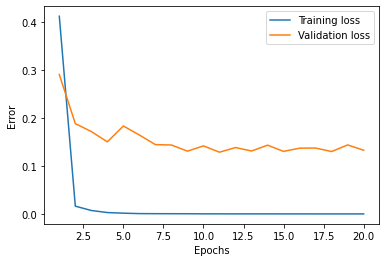

In [ ]:
import pickle
import matplotlib.pyplot as plt

losses = pickle.load(open('losses.p', 'rb'))

epochs = [e[0] for e in losses]
training_loss = [e[1] for e in losses]
val_loss = [e[2] for e in losses]

plt.plot(epochs, training_loss,  label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [18]:
  !python evaluate48_cuda.py --data='../../data_zip' --model='./model_20.pth'

  0% 0/12631 [00:00<?, ?it/s]evaluate48_cuda.py:49: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data = Variable(data, volatile=True).to(device)
/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet/gtsrb_resnet/code/model48.py:71: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
100% 12631/12631 [01:05<00:00, 192.47it/s]
Succesfully wrote gtsrb_kaggle.csv, you can upload this file to the kaggle competition at https://www.kaggle.com/c/nyu-cv-fall-2017/


In [26]:
import torch.onnx 

#Function to Convert to ONNX 
def Convert_ONNX(): 

    # set the model to inference mode 
    model.eval() 

    # Let's create a dummy input tensor  
    dummy_input = torch.randn(1, 3, 48, 48, requires_grad=True)  

    # Export the model   
    torch.onnx.export(model,         # model being run 
         dummy_input,       # model input (or a tuple for multiple inputs) 
         "traffic_sign_ImageClassifier_64.onnx",       # where to save the model  
         export_params=True,  # store the trained parameter weights inside the model file 
         opset_version=10,    # the ONNX version to export the model to 
         do_constant_folding=True,  # whether to execute constant folding for optimization 
         input_names = ['modelInput'],   # the model's input names 
         output_names = ['modelOutput'], # the model's output names 
         dynamic_axes={'modelInput' : {0 : 'batch_size'},    # variable length axes 
                                'modelOutput' : {0 : 'batch_size'}}) 
    print(" ") 
    print('Model has been converted to ONNX')

In [27]:
from model48 import Net

# Let's build our model 
#train(5) 
#print('Finished Training') 

# Test which classes performed well 
#testAccuracy() 

# Let's load the model we just created and test the accuracy per label 
model = Net() 
path = "model_20.pth" 
model.load_state_dict(torch.load(path)) 

# Test with batch of images 
#testBatch() 
# Test how the classes performed 
#testClassess() 

# Conversion to ONNX 
Convert_ONNX()

/content/drive/MyDrive/Colab Notebooks/traffic-sign/GTSRB_ResNet/gtsrb_resnet/code/model48.py:71: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


 
Model has been converted to ONNX
